In [399]:

import math
import itertools
import numpy as np
import pylab as pl
import pandas as pd
import time
import gc
import matplotlib.pyplot as plt
import scipy
from __future__ import unicode_literals
%matplotlib inline

In [400]:

def insertion_sort(A):
    time1=time.clock()
    j=1
    while j < len(A):
        pos = A[j]
        i = j - 1
        while (i >= 0) and (A[i] > pos):
            A[i + 1] = A[i]
            i -= 1
        A[i + 1] = pos
        j += 1
    return time.clock()-time1

In [401]:
a=[3,4,5,6]
insertion_sort(a)

1.108416290662717e-05

In [402]:
def calc_timemejor( n):
    timesum = 0
    gc.collect()
    for i in range(1000):
        ordenada=range(1,n+1)
    
        timesum+=insertion_sort(ordenada)
        
    return (timesum/1000)

In [403]:
calc_timemejor(4)

8.048333451370126e-06

In [404]:
def calc_timepeor( n):
    
    timesum = 0
    gc.collect()
   
    for i in range(1000):
        desordenada=range(n,0,-1)
        
        timesum+=insertion_sort(desordenada)
        
    return (timesum/1000)

In [405]:
calc_timepeor(4)

9.248707288861624e-06

In [406]:
def calc_timemedio(n):
 
    medio=0
    tam=0
    timesum=0
    gc.collect()
    lista=range(1,n+1)
    for i in range(1000):
        for p in itertools.permutations(lista):
            medio+=insertion_sort(list(p))
            tam+=1
        timesum+=(medio/tam)
        
    return (timesum/1000)
            

In [407]:
calc_timemedio(4)

8.185562888703285e-06

In [408]:
mejores=[]
mejor4=calc_timemejor(4)
mejor5=calc_timemejor(5)
mejor6=calc_timemejor(6)
mejores.append(mejor4)
mejores.append(mejor5)
mejores.append(mejor6)
print mejores

[4.961599543094053e-06, 7.281884250915028e-06, 9.608737302187365e-06]


In [409]:
peores=[]
peores.append(calc_timepeor(4))
peores.append(calc_timepeor(5))
peores.append(calc_timepeor(6))
print peores


[1.0843595055121113e-05, 1.4865914497931953e-05, 1.8874686593335354e-05]


In [410]:
promedios=[]
promedios.append( calc_timemedio(4))
promedios.append( calc_timemedio(5))
promedios.append( calc_timemedio(6))
print promedios

[7.203337981051723e-06, 8.871961806073066e-06, 1.1307301531686491e-05]


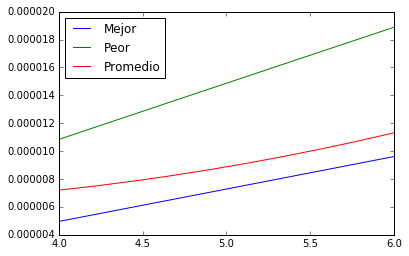

In [411]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
import math

x = np.linspace(4,6,3,endpoint=True)
x2 = np.linspace(4,6,10,endpoint=True)

f1 = interp1d(x,mejores,kind='quadratic')
f2 = interp1d(x,peores,kind='quadratic')
f3 = interp1d(x,promedios,kind='quadratic')

#plt.plot(x,mejores,x,peores,x,promedios)
plt.plot(x2,f1(x2),x2,f2(x2),x2,f3(x2))
plt.legend(['Mejor','Peor','Promedio'],loc='best')